# Web-Scraping Project: ICOs and IEOs

In [1158]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

Thanks to the following combination of BeautifulSoup and requests we can obtain a fully prased .html file.

In [818]:
response = requests.get("https://icodrops.com/ico-stats/")
content = response.content
parser = BeautifulSoup(content, "html.parser")
print(response.status_code)

200


We now proceed with the data scraping

#### goal

In [820]:
goal = []
for row in parser.find_all("div",attrs={'class':'goal-in-card'}):
    row = row.text
    row = row.split()
    goal.append(row)
    df_d = pd.DataFrame(goal, columns = ["received", "no", "goal", "Pct. of goal"])
    df_d = df_d.drop(["no"],1)

#### names

In [821]:
names = []
for row in parser.find_all("div", attrs={'class':'ico-main-info'}):
    row = row.find("h3")
    names.append(row.text)
df_d["Ticker"] = names
df_d["Ticker"] = df_d["Ticker"].str.strip()

#### category

In [822]:
category = []
for row in parser.find_all("span",attrs={'class':'ico-category-name'}):
    row = row.text
    category.append(row)
df_d["category"] = category

#### ROI

In [823]:
usd_roi = []
for row in parser.find_all("div", attrs={'class':'st_r_usd'}):
    row = row.text
    row = str(row)
    row = row.replace("USD ROI","")
    row = row.replace("x","")
    usd_roi.append(row.strip())
    
eth_roi = []
for row in parser.find_all("div", attrs={'class':'st_r_eth'}):
    row = row.text
    row = str(row)
    row = row.replace("ETH","")
    row = row.replace("x","")
    eth_roi.append(row.strip())

btc_roi = []
for row in parser.find_all("div", attrs={'class':'st_r_btc'}):
    row = row.text
    row = str(row)
    row = row.replace("BTC","")
    row = row.replace("x","")
    btc_roi.append(row.strip())

df_d["USD ROI"] = usd_roi
df_d["ETH ROI"] = eth_roi
df_d["BTC ROI"] = btc_roi

#### Market Price

In [824]:
mrk_price = []
for row in parser.find_all("div", attrs={'class':'usd-price'}):
    row = str(row)
    row = re.findall("\d+\.\d+",row)
    row = str(row)
    row = row.replace("[", "")
    row = row.replace("]", "")
    row = row.replace("'", "")
    row = row
    mrk_price.append(row)
df_d["Market_Price"] = mrk_price

In [825]:
ico_price = []
for row in parser.find_all("div", attrs= {'class':'token_pr'}):
    row = str(row)
    row = re.findall("\d+\.\d+",row)
    row = str(row)
    row = row.replace("[", "")
    row = row.replace("]", "")
    row = row.replace("'", "")
    ico_price.append(row)
df_d["ICO price"] = ico_price

#### date

In [826]:
date = []
for row in parser.find_all("div", attrs={'class':'wff'}):
    date.append(row.text[0:8])
df_d["Date"] = date[:828]

In [827]:
df_d.head()

,received,goal,Pct. of goal,Ticker,category,USD ROI,ETH ROI,BTC ROI,Market_Price,ICO price,Date
0,"$2,400,000","$5,600,000",43%,Vodi X,Blockchain Service,inf,inf,inf,0.0104,,May 2019
1,"$5,600,000","$5,600,000",100%,Trias,Blockchain,2.53,1.95,2.32,0.0101,0.0040,May 2019
2,"$1,000,000,000","$1,000,000,000",100%,Bitfinex,Exchange,1.44,1.02,1.16,1.44,1.00,May 2019
3,"$50,500,000","$50,500,000",100%,Thunder Token,Currency,1.43,0.90,0.98,0.0214,0.0150,May 2019
4,"$600,000","$2,600,000",23%,EVEDO,Blockchain Service,0.35,0.23,0.24,0.0309,0.0880,May 2019


In [828]:
df = df_d.drop_duplicates(subset=["Ticker"])

#### Volume, Market Cap, Changeday

In [829]:
volume = []
mark_cap = []
changeday = []
for row in parser.find_all("div", attrs={'id':'st_volume'}):
    row = row.text
    row = str(row)
    row = row.replace("$","")
    row = row.replace(",","")
    row = row.strip()
    row = int(row)
    volume.append(row)
for row in parser.find_all("div", attrs={'id':'market_cap'}):
    row = row.text
    row = str(row)
    row = row.replace("Pending", "0")
    row = row.replace("$", "")
    row = row.replace(",", "")
    row = row.strip()
    row = int(row)
    mark_cap.append(row)
for row in parser.find_all("div", attrs={'id':'change_day'}):
    row = row.text
    row = str(row)
    row = row.strip()
    row = row.replace("%","")
    if row == " ":
        row = 0.0
        changeday.append(row)
    else:
        row = row
        changeday.append(row)
df.loc[0:413,"volume"] = volume[0:413]
df.loc[0:413,"mark_cap"] = mark_cap[0:413]
df.loc[0:413,"changeday"] = changeday[0:413]

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Now we proceed with cleaning of the various columns

#### goal

In [830]:
df["goal"] = df["goal"].str.replace(",","")
df["goal"] = df["goal"].str.replace("$","")
df["goal"] = df["goal"].str.replace("SET","0")
df["goal"] = df["goal"].str.replace("None","0").astype(float)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

#### received

In [831]:
df["received"] = df["received"].str.replace(",","")
df["received"] = df["received"].str.replace("$","")
df["received"] = df["received"].str.replace("GOAL","0")
df["received"] = df["received"].str.replace("0:","0").astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

#### Pct. of goal

In [832]:
df["Pct. of goal"] = df["Pct. of goal"].str.replace("%","").astype("float") / 100

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### ROI

In [1152]:
df["USD ROI"] = df["USD ROI"].astype(float)
df["BTC ROI"] = df["BTC ROI"].astype(float)
df["ETH ROI"] = df["ETH ROI"].astype(float)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

The final dataset - after scraping and cleaning - looks like this

In [1159]:
df.head()

,received,goal,Pct. of goal,Ticker,category,USD ROI,ETH ROI,BTC ROI,Market_Price,ICO price,Date,volume,mark_cap,changeday,exchange
0,2400000,5.600000e+06,0.43,Vodi X,Blockchain Service,inf,inf,inf,0.0104,,May 2019,1437892,0,-5.23,bittrex
1,5600000,5.600000e+06,1.00,Trias,Blockchain,2.530000,1.950000,2.320000,0.0101,0.0040,May 2019,182380,0,+0.69,kucoin
2,1000000000,1.000000e+09,1.00,Bitfinex,Exchange,1.440000,1.020000,1.160000,1.44,1.00,May 2019,4587502,0,-1.7,no-data
3,50500000,5.050000e+07,1.00,Thunder Token,Currency,1.430000,0.900000,0.980000,0.0214,0.0150,May 2019,16743926,0,-1.29,huobi
4,600000,2.600000e+06,0.23,EVEDO,Blockchain Service,0.350000,0.230000,0.240000,0.0309,0.0880,May 2019,24988,192298,-11.37,bitforex


Yet we are missing some important data on the exchange that issue each coin. Thus, we develop an iterative loop that scrapes the name of the exchange from the website of each single coins.

In [834]:
tickers = []
for row in df["Ticker"]:
    row = row.lower()
    row = row.replace(" ","-")
    tickers.append(row)

In [835]:
iecs = []
def_sites = []
for site in tickers:
    response = requests.get(f"https://icodrops.com/{site}/")
    if response.status_code == 200:
        print(response.status_code, site)
        content = response.content
        parser = BeautifulSoup(content, "html.parser")
        lst = parser.find_all("div", attrs={'class':'important-note'})
        if str(len(lst)) == "0":
            row = "No IEO" + site
            iecs.append(row)
        elif str(len(lst)) == "1" :
            string = str(lst[0].text)
            if "IEO" in string or "ieo" in string:
                if len(re.split('^(.+?);', string)) == 1:
                    iecs.append(string)
                else:
                    g = re.split('^(.+?);', string)
                    iecs.append(g[1])
            else:
                iecs.append(string)
    else:
        print(response.status_code, site)
        def_sites.append(site)

200 vodi-x
200 trias
200 bitfinex
200 thunder-token
200 evedo
404 ocean-protocol
200 duo-network
200 matic-network
200 dexon
200 drep
200 cnns
200 redfox
200 newton-project
200 unification
200 blockcloud
200 multivac
200 veriblock
200 paytomat
200 v-system
200 top-network
200 lition
200 celer-network
200 dos-network
200 fetch-ai
200 bittorrent
200 vanta-network
404 lto-network
200 beam
200 kambria
200 covalent
200 ultrain
200 bitmax
200 nos
200 atlas-protocol
200 aergo
200 lambda
200 metadium
200 ankr-network
200 bgogo
404 daex-(digital-assets-exchange)
200 carry-protocol
200 foam-protocol
200 usechain
200 dxchain
200 asura-coin
200 vite
200 farmatrust
200 quadrant-protocol
200 liquidity-network
200 contentbox
200 dacc
200 0xcert-protocol
200 bitscreener
200 midas-protocol
200 essentia
200 incx
200 elysian
200 dav-network
200 gonetwork
200 metronome
200 uchain
200 hashgard
200 airbloc-protocol
200 oneledger
200 fantom
200 alchemint
200 atonomi
200 hybridblock
200 quarkchain
200 cardsta

We notice that some sites had a 400 status_code this suggests that further data cleaning is needed

In [836]:
new_sites = []
for row in def_sites:
    row = row.replace("-", "")
    row = row.replace("(", "")
    row = row.replace(")", "")
    new_sites.append(row)

In [837]:
tickers = []
for row in df["Ticker"]:
    row = row.lower()
    row = row.replace(" ","-")
    tickers.append(row)
tickers = pd.Series(tickers)
new_sites = pd.Series(new_sites)
rem_sites = tickers[~tickers.isin(def_sites)]
new_sites = rem_sites.append(new_sites)

In [838]:
new_sites.head()

0           vodi-x
1            trias
2         bitfinex
3    thunder-token
4            evedo
dtype: object

Now that we have adjusted the names for the websites were we had issues we run the iteration again.

In [839]:
iecs = []
def_sites = []
for site in new_sites:
    response = requests.get(f"https://icodrops.com/{site}/")
    if response.status_code == 200:
        print(response.status_code, site)
        content = response.content
        parser = BeautifulSoup(content, "html.parser")
        lst = parser.find_all("div", attrs={'class':'important-note'})
        if str(len(lst)) == "0":
            row = "No IEO" + site
            iecs.append(row)
        elif str(len(lst)) == "1" :
            string = str(lst[0].text)
            if "IEO" in string or "ieo" in string:
                if len(re.split('^(.+?);', string)) == 1:
                    iecs.append(string)
                else:
                    g = re.split('^(.+?);', string)
                    iecs.append(g[1])
            else:
                iecs.append(string)
    else:
        print(response.status_code, site)
        def_sites.append(site)

200 vodi-x
200 trias
200 bitfinex
200 thunder-token
200 evedo
200 duo-network
200 matic-network
200 dexon
200 drep
200 cnns
200 redfox
200 newton-project
200 unification
200 blockcloud
200 multivac
200 veriblock
200 paytomat
200 v-system
200 top-network
200 lition
200 celer-network
200 dos-network
200 fetch-ai
200 bittorrent
200 vanta-network
200 beam
200 kambria
200 covalent
200 ultrain
200 bitmax
200 nos
200 atlas-protocol
200 aergo
200 lambda
200 metadium
200 ankr-network
200 bgogo
200 carry-protocol
200 foam-protocol
200 usechain
200 dxchain
200 asura-coin
200 vite
200 farmatrust
200 quadrant-protocol
200 liquidity-network
200 contentbox
200 dacc
200 0xcert-protocol
200 bitscreener
200 midas-protocol
200 essentia
200 incx
200 elysian
200 dav-network
200 gonetwork
200 metronome
200 uchain
200 hashgard
200 airbloc-protocol
200 oneledger
200 fantom
200 alchemint
200 atonomi
200 hybridblock
200 quarkchain
200 cardstack
200 bitrewards
200 omnitude
200 rightmesh
200 bigbom
200 dcc
200 pc

Yet, there are still some requests that seem defective.

In [840]:
def_sites

['daexdigitalassetsexchange',
 'phantasmachain',
 'theabyssdaico',
 'policypalnetwork',
 'debitumnetwork',
 'cln',
 'expand',
 'concensum',
 'restartenergydemocracy',
 'telcoin',
 'stktoken',
 'insolar',
 'tael',
 'snovian.space',
 'raidennetwork',
 'chronologic']

By manually reviewing the issue we created a list with the right values.

In [841]:
remaing_def = pd.Series(["daex", "phantasma-protocol", "theabyss", "policypal", "debitum", "colu", "gems", "copytrack", "restart-energy", "telco", "stack", "ins", "wabi", "snovio", "raiden", "chrono-logic"])
rem_sites = new_sites[~new_sites.isin(def_sites)]
new_sites = rem_sites.append(remaing_def)

The final iteration is ran on all values.

In [1147]:
iecs = []
source = []
def_sites = []
for site in new_sites:
    response = requests.get(f"https://icodrops.com/{site}/")
    if response.status_code == 200:
        print(response.status_code, site)
        content = response.content
        parser = BeautifulSoup(content, "html.parser")
        lst = parser.find_all("div", attrs={'class':'important-note'})
        if str(len(lst)) == "0":
            row = "No IEO" + " " + site
            iecs.append(row)
            source.append(site)
        elif str(len(lst)) == "1":
            string = str(lst[0].text)
            if "IEO" in string or "ieo" in string:
                if len(re.split('^(.+?);', string)) == 1:
                    iecs.append(string)
                    source.append(site)
                else:
                    g = re.split('^(.+?);', string)
                    iecs.append(g[1])
                    source.append(site)
            else:
                iecs.append(string)
                source.append(site)
    else:
        print(response.status_code, site)
        def_sites.append(site)

200 vodi-x
200 trias
200 bitfinex
200 thunder-token
200 evedo
200 duo-network
200 matic-network
200 dexon
200 drep
200 cnns
200 redfox
200 newton-project
200 unification
200 blockcloud
200 multivac
200 veriblock
200 paytomat
200 v-system
200 top-network
200 lition
200 celer-network
200 dos-network
200 fetch-ai
200 bittorrent
200 vanta-network
200 beam
200 kambria
200 covalent
200 ultrain
200 bitmax
200 nos
200 atlas-protocol
200 aergo
200 lambda
200 metadium
200 ankr-network
200 bgogo
200 carry-protocol
200 foam-protocol
200 usechain
200 dxchain
200 asura-coin
200 vite
200 farmatrust
200 quadrant-protocol
200 liquidity-network
200 contentbox
200 dacc
200 0xcert-protocol
200 bitscreener
200 midas-protocol
200 essentia
200 incx
200 elysian
200 dav-network
200 gonetwork
200 metronome
200 uchain
200 hashgard
200 airbloc-protocol
200 oneledger
200 fantom
200 alchemint
200 atonomi
200 hybridblock
200 quarkchain
200 cardstack
200 bitrewards
200 omnitude
200 rightmesh
200 bigbom
200 dcc
200 pc

Now that we have the data we need to clean it, as most of it does not hold any insightful information about which exchange has issued the coin.

In [1148]:
mean_exc = []
for row in iecs:
    row = row.lower()
    if "ieo on" in row:
        row = row[:len(row)]
        mean_exc.append(row)
    elif "listed on" in row:
        wor = len(row) - 30
        mean_exc.append(row)
    else: 
        row = "no-disclosed exchange"
        mean_exc.append(row)
        
mean_exc[0:10]

['important: ieo on bittrex',
 'important: ieo on kucoin spotlight and chainx',
 'no-disclosed exchange',
 'important: ieo on huobi prime lite',
 'important: ieo on bitforex and p2pb2b.io',
 'important: ieo on bitmax',
 'no-disclosed exchange',
 'important: ieo on lbank',
 'important: ico has closed 06/08/2018. ieo on gate.io ico token price - 1 drep = 0.0077 usd',
 'no-disclosed exchange']

In [1149]:
df["exchange"] = mean_exc

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1150]:
df["exchange"].value_counts().head()

no-disclosed exchange                                                                381
important: dragonchain is listed on etherdelta (https://etherdelta.com/#drgn-eth)      2
important: ieo on bittrex launchpad                                                    1
important: bread is listed on binance (brd/eth)                                        1
important: raiden network is now listed on etherdelta, binance\n                       1
Name: exchange, dtype: int64

We now clean the data so that only the name of the exchange is given.

In [1151]:
exchanges = ["binance", "huobi", "kucoin", "chainx", "bitforex", "bittrex", "etherdelta", "okex", "p2pb2b.io", "exmo", "lbank", "bitmax"]
exchanges = pd.Series(exchanges)
exchanges[11]

'bitmax'

In [1153]:
lst = []
for row in df["exchange"]:
    if exchanges[0] in row:
        row = exchanges[0]
        lst.append(row)
    elif exchanges[1] in row:
        row = exchanges[1]
        lst.append(row)
    elif exchanges[2] in row:
        row = exchanges[2]
        lst.append(row)
    elif exchanges[3] in row:
        row = exchanges[3]
        lst.append(row)
    elif exchanges[4] in row:
        row = exchanges[4]
        lst.append(row)    
    elif exchanges[5] in row:
        row = exchanges[5]
        lst.append(row)
    elif exchanges[6] in row:
        row = exchanges[6]
        lst.append(row)
    elif exchanges[7] in row:
        row = exchanges[7]
        lst.append(row)
    elif exchanges[8] in row:
        row = exchanges[8]
        lst.append(row)
    elif exchanges[9] in row:
        row = exchanges[9]
        lst.append(row)   
    elif exchanges[10] in row:
        row = exchanges[10]
        lst.append(row)
    elif exchanges[11] in row:
        row = exchanges[11]
        lst.append(row)
    else:
        row = "no-data"
        lst.append(row)
df["exchange"] = lst

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


The final dataset looks like this.

In [1154]:
df.head()

,received,goal,Pct. of goal,Ticker,category,USD ROI,ETH ROI,BTC ROI,Market_Price,ICO price,Date,volume,mark_cap,changeday,exchange
0,2400000,5.600000e+06,0.43,Vodi X,Blockchain Service,inf,inf,inf,0.0104,,May 2019,1437892,0,-5.23,bittrex
1,5600000,5.600000e+06,1.00,Trias,Blockchain,2.530000,1.950000,2.320000,0.0101,0.0040,May 2019,182380,0,+0.69,kucoin
2,1000000000,1.000000e+09,1.00,Bitfinex,Exchange,1.440000,1.020000,1.160000,1.44,1.00,May 2019,4587502,0,-1.7,no-data
3,50500000,5.050000e+07,1.00,Thunder Token,Currency,1.430000,0.900000,0.980000,0.0214,0.0150,May 2019,16743926,0,-1.29,huobi
4,600000,2.600000e+06,0.23,EVEDO,Blockchain Service,0.350000,0.230000,0.240000,0.0309,0.0880,May 2019,24988,192298,-11.37,bitforex


In conclusion, we plot the ROIs for every exchange in our dataset.

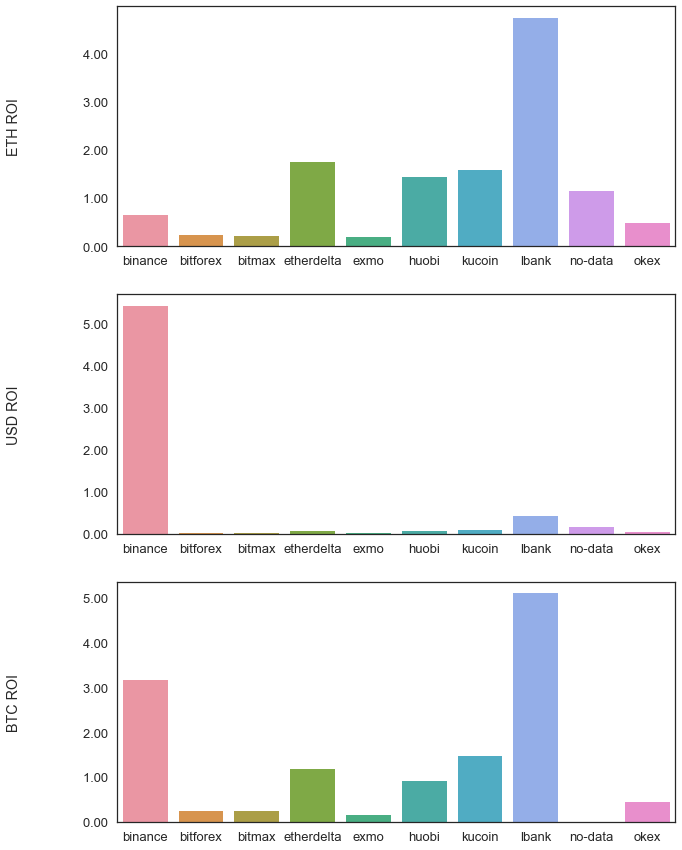

In [1157]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=False)

group_pct = df.groupby("exchange", as_index= False)["ETH ROI","USD ROI", "BTC ROI"].mean()
group_pct = group_pct.drop(3,axis = 0)
group_pct= group_pct.rename(columns = {"exchange": ""})

x = group_pct[""]
y = group_pct["ETH ROI"]
sns.barplot(x=x, y=y, data = group_pct, ax = ax1)
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:20,.2f}'.format(x) for x in vals])



y_1 = group_pct["USD ROI"]
sns.barplot(x=x, y=y_1, data = group_pct, ax = ax2)
vals = ax1.get_yticks()
ax2.set_yticklabels(['{:20,.2f}'.format(x) for x in vals])  


y_2 = group_pct["BTC ROI"]
sns.barplot(x=x, y=y_2, data = group_pct, ax = ax3)
vals = ax1.get_yticks()
ax3.set_yticklabels(['{:20,.2f}'.format(x) for x in vals])   

plt.show()